In [1]:
import numpy as np
from gym_sokoban.envs import SokobanEnv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def render_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    image = env.render(mode)

    plt.figure(dpi=200) 
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def print_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    print(env.room_state)

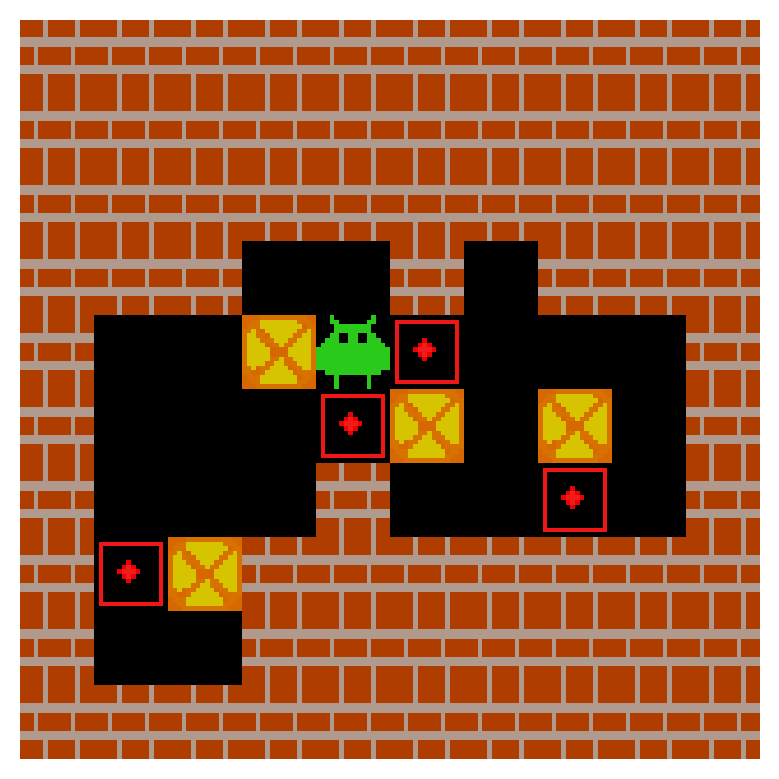

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 5 2 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [3]:
class SokobanEnvFixated(SokobanEnv):     
    def reset(self, second_player=False, render_mode='rgb_array'):

        self.room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 1, 1, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 1, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 4, 5, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 4, 1, 4, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 4, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.box_mapping = {(6, 7): (5, 7), (5, 4): (5, 5), (4, 5): (4, 3), (7, 1): (7, 2)}

        self.player_position = np.argwhere(self.room_state == 5)[0]
        self.num_env_steps = 0
        self.reward_last = 0
        self.boxes_on_target = 0

        starting_observation = self.render(render_mode)
        return starting_observation
  
env = SokobanEnvFixated(dim_room=(5, 5), max_steps=40, num_boxes=2, num_gen_steps=None, reset=True)
render_state(env)
print_state(env)

In [4]:
UP, DOWN, LEFT, RIGHT = 1, 2, 3, 4

def doStep(step):
    env.step(step)
    render_state(env)
    print_state(env)

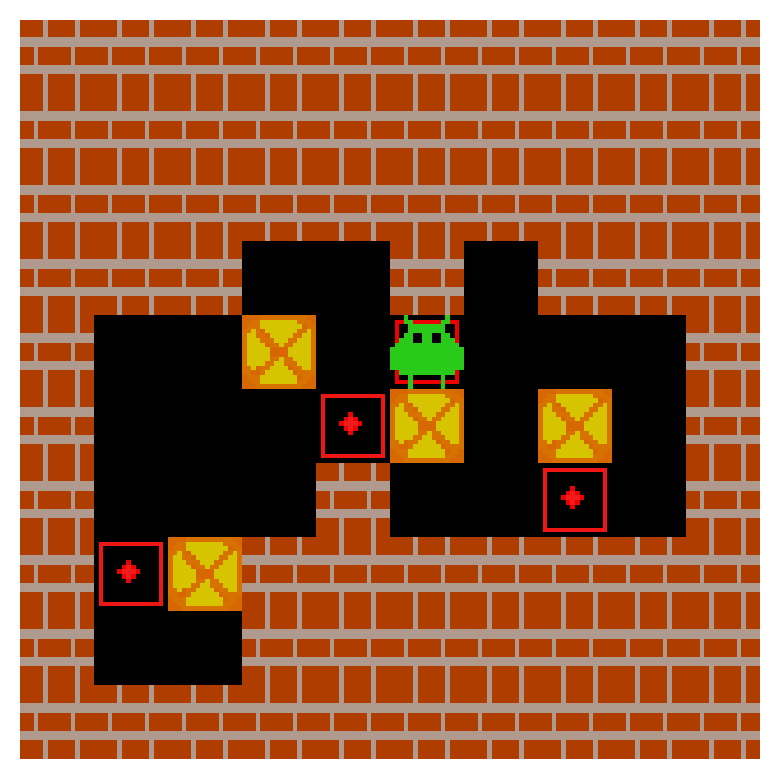

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 5 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [5]:
# Claude 3.7 Sonnet
# Question:     Can you give me the next action (UP, DOWN, LEFT, RIGHT) to solve this Sokoban game?
#               All the boxes(4) must be pushed from the player(5) on to the buttons (2) over the empty spaces (1) avoiding the walls (0).
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 5 2 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
# Answer:       Based on the current Sokoban position, I recommend moving RIGHT.
#               
#               Looking at the game state:
#               - You (player 5) are currently at position [4, 4]
#               - There's a box (4) at position [4, 3] to your left
#               - There's a box (4) at position [5, 5] below and to your right
#               - There's a box (4) at position [4, 7] to your right
#               - There's a box (4) at position [7, 2] in the bottom left section
#               
#               If you move RIGHT, you'll be at position [4, 5], which puts you on a goal/button (2). This is a safe move that maintains your options while positioning you closer to the box at [5, 5], which you can then potentially push down to reach the goal at [7, 7].
#               
#               Moving right gives you the most flexibility for your next moves without blocking yourself into a corner or creating an unsolvable position.
doStep(RIGHT)

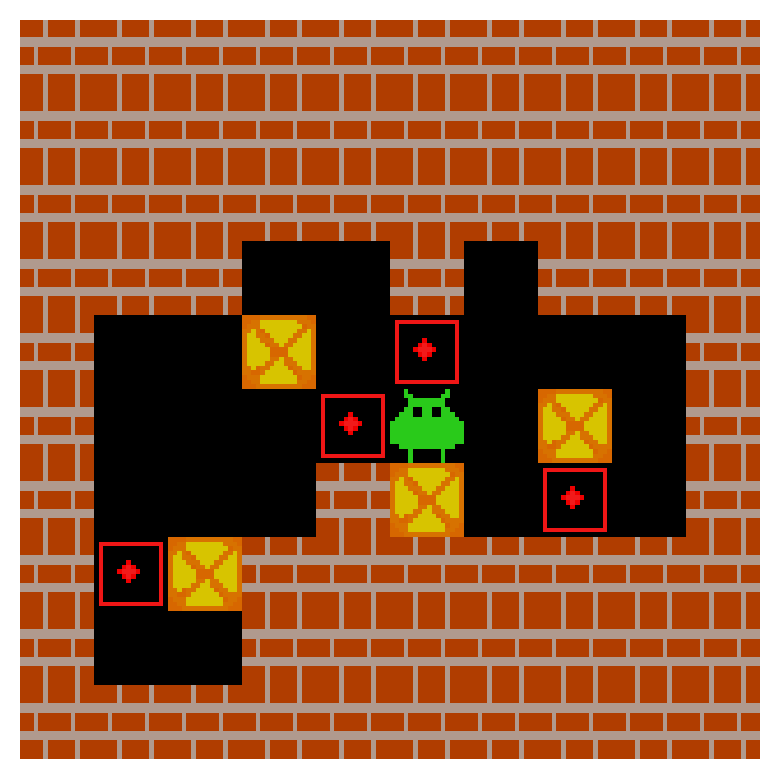

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 5 1 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 5 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Looking at the updated game state, I recommend moving DOWN.
#               
#               If you move DOWN, you'll be at position [5, 5], which will push the box at that position down to [6, 5]. This accomplishes several things:
#               
#               1. It moves the box closer to the goal at [6, 7]
#               2. It opens up more space for maneuvering in the central area
#               3. It doesn't block access to any of the other boxes or goals
#               
#               Moving down is strategically advantageous as it begins clearing the central path while maintaining your flexibility to reach the other boxes. After pushing this box down, you'll likely want to work your way around to push it further toward its destination goal.
doStep(DOWN)

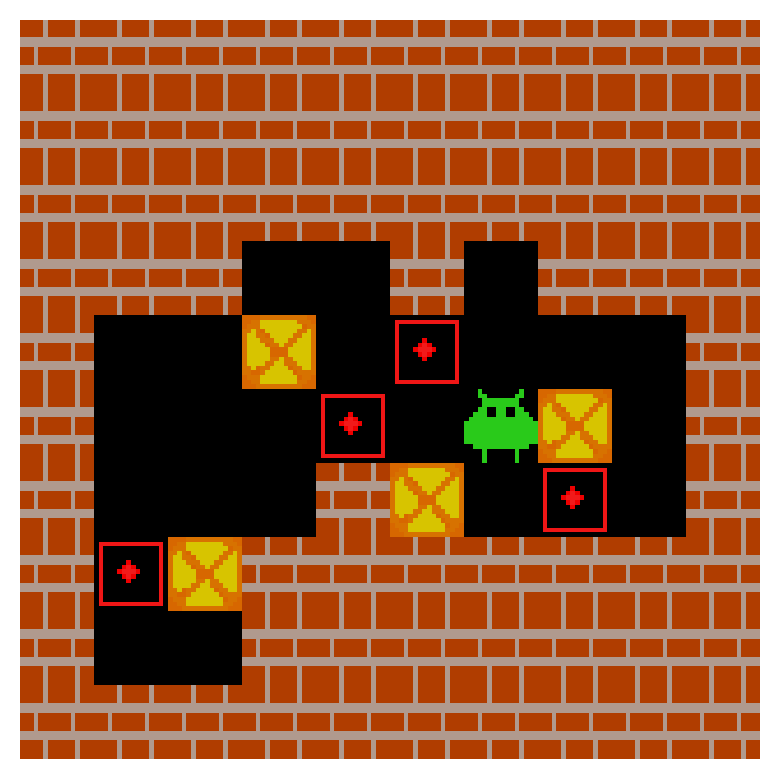

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 5 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 5 1 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Looking at the updated game state, I recommend moving RIGHT.
#               
#               Moving RIGHT will position you at [5, 6], which sets you up to push the box at [5, 7] to the right, placing it on the goal at [5, 8]. This is a good strategic move because:
#               
#               1. It allows you to place one box on a goal, making progress toward solving the puzzle
#               2. It keeps the central area open for further maneuvering
#               3. It doesn't block access to the other boxes or goals
#               
#               After this move, you'll be able to work on positioning the other boxes while keeping good mobility around the board.
doStep(RIGHT)

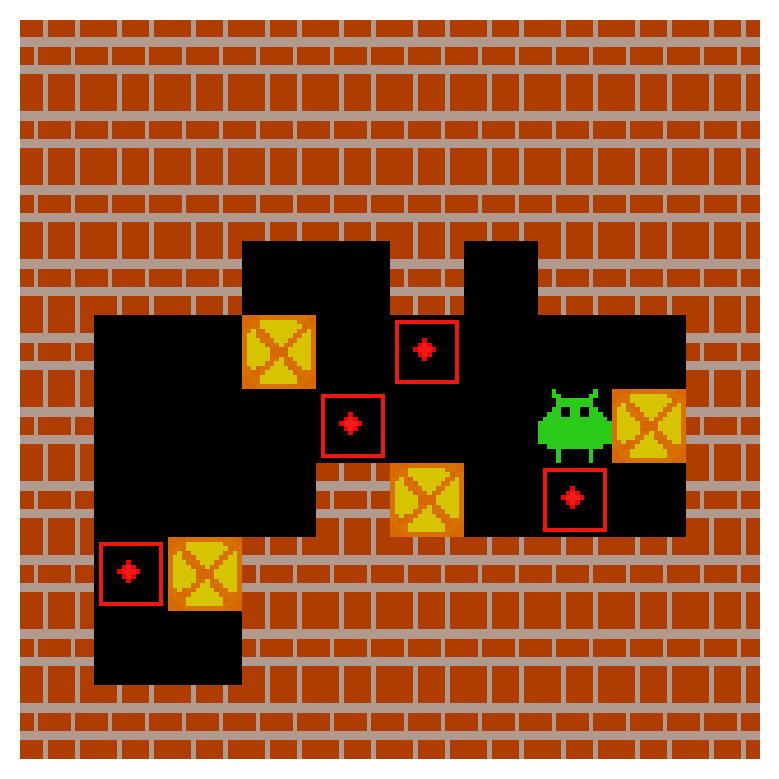

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 1 5 4 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 1 5 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Looking at the updated game state, I recommend moving RIGHT.
#               
#               Moving RIGHT will push the box at [5, 7] onto the goal at [5, 8]. This will successfully place one of the boxes on a goal, which is excellent progress.
#               
#               After pushing this box onto the goal, you'll still have good mobility to work with the remaining boxes, particularly the ones at [4, 3], [6, 5], and [7, 2]. The central area will remain accessible, giving you flexibility to navigate to different parts of the board.
#               
#               This is a safe and progressive move that doesn't risk creating any deadlock situations.
doStep(RIGHT)

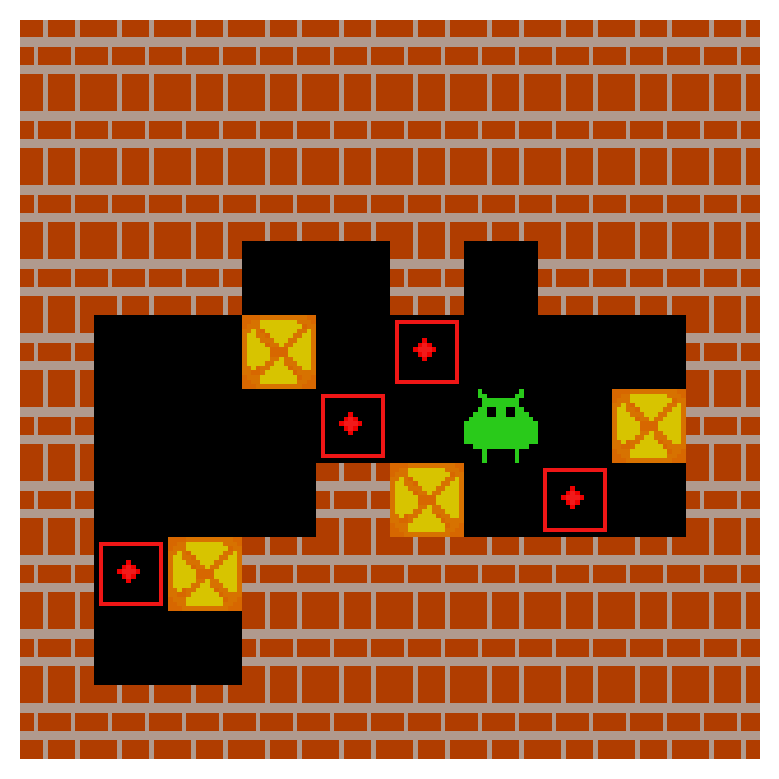

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 5 1 4 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 1 1 5 4 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Looking at the updated game state, I recommend moving LEFT.
#               
#               Moving LEFT will position you at [5, 6], allowing you to start working on the box at [6, 5] that's currently in the middle of the board.
#               
#               This is a strategic move because:
#               1. You've already successfully pushed one box to the right edge
#               2. Now you need to focus on the other boxes
#               3. Moving left gives you better positioning to push the box at [6, 5] toward the goal at [6, 7]
#               
#               After this move, you'll likely want to continue working your way toward positioning that middle box correctly while maintaining access to the other boxes on the board.
doStep(LEFT)

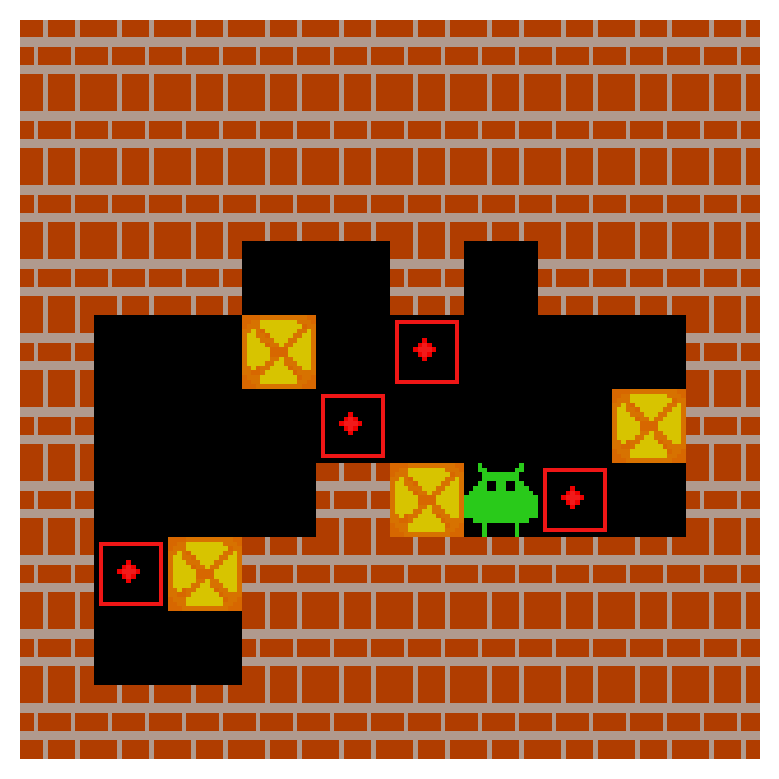

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 1 1 4 0]
 [0 1 1 1 0 4 5 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 1 5 1 4 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       Looking at the updated game state, I recommend moving DOWN.
#               
#               Moving DOWN will position you at [6, 6], which sets you up to push the box at [6, 5] to the right in a subsequent move, toward the goal at [6, 7]. This box is currently blocking an important path in the center of the board.
#               
#               This is a strategic move because:
#               1. It helps you work toward repositioning the central box at [6, 5]
#               2. It maintains good mobility around the board
#               3. It's part of the sequence needed to get that second box onto its target goal
#               
#               After this move, you'll be well-positioned to continue manipulating the boxes in the central area while maintaining access to the remaining boxes on the board.
doStep(DOWN)

In [ ]:
# Result:       Two boxes can no longer be positioned correctly. 
#               It seems as if the next possible push action is always taken